# Ocean transport integrals

Global, northward transport of seawater is here integrated over the Global Ocean from three-dimensional, time-varying velocity fields.

**key functions:** 
- `LatitudeCircles` computes integration paths that follow latitude circles
- `ThroughFlow` computes transports through these integration paths

### Time mean, vertically integrated transports

This step has been done earlier for you and results saved to a few smaller files. 

Let's re-read those using `trsp_read` from `prepare_transports.jl`.

In [1]:
using MeshArrays
include("prepare_transports.jl")

if !isdir("GRID_LLC90") 
    run(`git clone https://github.com/gaelforget/GRID_LLC90`)
end
mygrid=GridSpec("LLC90");
GridVariables=GridLoad(mygrid);

(TrspX, TrspY, TauX, TauY, SSH)=trsp_read(mygrid,"GRID_LLC90/");

#using Statistics
#using FortranFiles
#!isdir("nctiles_climatology") ? error("missing files") : nothing
#include(joinpath(dirname(pathof(MeshArrays)),"gcmfaces_nctiles.jl"))
#(TrspX, TrspY, TauX, TauY, SSH)=trsp_prep(mygrid,GridVariables,"GRID_LLC90/");

### Transport integrals across parallels

In [2]:
UVmean=Dict("U"=>TrspX,"V"=>TrspY,"dimensions"=>["x","y"]);
LC=LatitudeCircles(-89.0:89.0,GridVariables);

T=Array{Float64,1}(undef,length(LC));
for i=1:length(LC)
   T[i]=ThroughFlow(UVmean,LC[i],GridVariables)
end

Plot result:

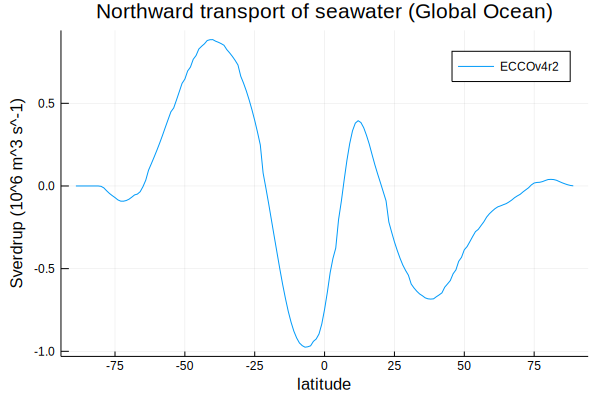

In [3]:
using Plots
lat=-89.0:89.0
plot(lat,T/1e6,xlabel="latitude",ylabel="Sverdrup (10^6 m^3 s^-1)",
    label="ECCOv4r2",title="Northward transport of seawater (Global Ocean)")

Plot transport vector component Maps. Notice that vector field orientations differ amongst the arrays.

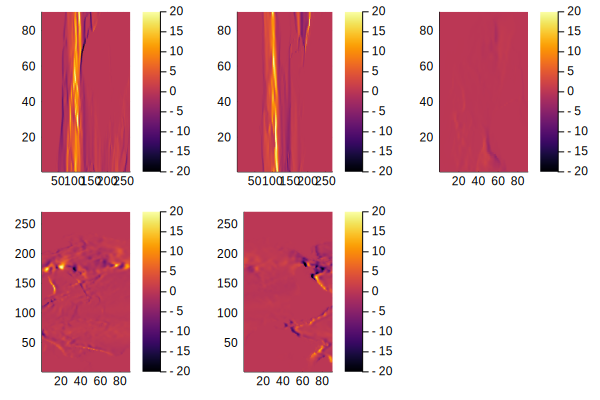

In [4]:
include(joinpath(dirname(pathof(MeshArrays)),"Plots.jl"))
heatmap(1e-6*TrspX,clims=(-20.0,20.0))
#heatmap(1e-6*TrspY,clims=(-20.0,20.0))